<a href="https://colab.research.google.com/github/shubhamtapadia/DataScience_Stuff/blob/main/Agricultural_Production_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Model that suggest most suitable crops to grow based on available enviroment , soil condition    

In [2]:
#Data Manupulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sb

#Interactivity
from ipywidgets import interact

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
df=pd.read_csv('/gdrive/MyDrive/DataScience_Stuff/agriculture_data.csv')
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
df.shape

(2200, 8)

In [6]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [7]:
#Check missing Null values

df.isnull()
df.isnull().sum()

# if there is missing values the fill with mean , median , mode
# Mean : Numareical colum 
# Median : Lots of outliers
# Mode : Catagorical value

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
# As looking intodata setwe can see data types have int, float, and obj 
# obj is for label
# Now we check what are the unique values in Label col

df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
# As well as 

df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
# Here we can see 
# 1. df['label'].value_counts() this give you unique value with there no of records
# 2. df['label'].unique() this give you only unique value

In [11]:
# Now lets check Summary of all crops

print("Average Ratio of Nitrogen in the soil : {0:.2f}".format(df['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0:.2f}".format(df['P'].mean()))
print("Average Ratio of Potassium in the soil : {0:.2f}".format(df['K'].mean()))
print("Average Ratio of Temperature in celsius : {0:.2f}".format(df['temperature'].mean()))
print("Average Ratio of Humidity in % : {0:.2f}".format(df['humidity'].mean()))
print("Average Ratio of ph in the soil : {0:.2f}".format(df['ph'].mean()))
print("Average Ratio of Rainfall in mm : {0:.2f}".format(df['rainfall'].mean()))

Average Ratio of Nitrogen in the soil : 50.55
Average Ratio of Phosphorous in the soil : 53.36
Average Ratio of Potassium in the soil : 48.15
Average Ratio of Temperature in celsius : 25.62
Average Ratio of Humidity in % : 71.48
Average Ratio of ph in the soil : 6.47
Average Ratio of Rainfall in mm : 103.46


In [12]:
# Now we closly look into Min, Avg, Max for each crop

@interact
def summary(crops = list(df.label.value_counts().index)):
  x= df[df.label == crops]
  print("___________________________________________________")
  print("Statistic of Nitrogen :")
  print("Minimum Nitrogen required :",x['N'].min())
  print("Average Nitrogen required :",x['N'].mean())
  print("Mximum Nitrogen required :",x['N'].max())
  print("___________________________________________________")
  print("Statistic of Phosphorous :")
  print("Minimum Phosphorous required :",x['P'].min())
  print("Average Phosphorous required :",x['P'].mean())
  print("Mximum Phosphorous required :",x['P'].max())
  print("___________________________________________________")
  print("Statistic of Potassium :")
  print("Minimum Potassium required :",x['K'].min())
  print("Average Potassium required :",x['K'].mean())
  print("Mximum Potassium required :",x['K'].max())
  print("___________________________________________________")
  print("Statistic of Temperature :")
  print("Minimum Temperature required :",x['temperature'].min())
  print("Average Temperature required :",x['temperature'].mean())
  print("Mximum Temperature required :",x['temperature'].max())
  print("___________________________________________________")
  print("Statistic of Humidity :")
  print("Minimum Humidity required :",x['humidity'].min())
  print("Average Humidity required :",x['humidity'].mean())
  print("Mximum Humidity required :",x['humidity'].max())
  print("___________________________________________________")
  print("Statistic of ph :")
  print("Minimum ph required :",x['ph'].min())
  print("Average ph required :",x['ph'].mean())
  print("Mximum ph required :",x['ph'].max())
  print("___________________________________________________")
  print("Statistic of Rainfall :")
  print("Minimum Rainfall required :",x['rainfall'].min())
  print("Average Rainfall required :",x['rainfall'].mean())
  print("Mximum Rainfall required :",x['rainfall'].max())
  print("___________________________________________________")
  

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [13]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
#Lets compare the average requirement for each crop with average condition

@interact 
def compare(conditions = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
  print("Average value for ",conditions, "is {0:.2f}".format(df[conditions].mean()))
  print("_____________________________________________________________________________")
  print("Rice : {0:.2f}".format(df[(df['label'] == 'rice')][conditions].mean()))
  print("maize : {0:.2f}".format(df[(df['label'] == 'maize')][conditions].mean()))
  print("chickpea : {0:.2f}".format(df[(df['label'] == 'chickpea')][conditions].mean()))
  print("kidneybeans : {0:.2f}".format(df[(df['label'] == 'kidneybeans')][conditions].mean()))
  print("pigeonpeas : {0:.2f}".format(df[(df['label'] == 'pigeonpeas')][conditions].mean()))
  print("mothbeans : {0:.2f}".format(df[(df['label'] == 'mothbeans')][conditions].mean()))
  print("mungbean : {0:.2f}".format(df[(df['label'] == 'mungbean')][conditions].mean()))
  print("blackgram : {0:.2f}".format(df[(df['label'] == 'blackgram')][conditions].mean()))
  print("lentil : {0:.2f}".format(df[(df['label'] == 'lentil')][conditions].mean()))
  print("pomegranate : {0:.2f}".format(df[(df['label'] == 'pomegranate')][conditions].mean()))
  print("banana : {0:.2f}".format(df[(df['label'] == 'banana')][conditions].mean()))
  print("mango : {0:.2f}".format(df[(df['label'] == 'mango')][conditions].mean()))
  print("grapes : {0:.2f}".format(df[(df['label'] == 'grapes')][conditions].mean()))
  print("watermelon : {0:.2f}".format(df[(df['label'] == 'watermelon')][conditions].mean()))
  print("muskmelon : {0:.2f}".format(df[(df['label'] == 'muskmelon')][conditions].mean()))
  print("apple : {0:.2f}".format(df[(df['label'] == 'apple')][conditions].mean()))
  print("orange : {0:.2f}".format(df[(df['label'] == 'orange')][conditions].mean()))
  print("papaya : {0:.2f}".format(df[(df['label'] == 'papaya')][conditions].mean()))
  print("coconut : {0:.2f}".format(df[(df['label'] == 'coconut')][conditions].mean()))
  print("cotton : {0:.2f}".format(df[(df['label'] == 'cotton')][conditions].mean()))
  print("jute : {0:.2f}".format(df[(df['label'] == 'jute')][conditions].mean()))
  print("coffee : {0:.2f}".format(df[(df['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [15]:
# Now we are creating a function where we can see which vrops required below avg or ablove avg conditions

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
  print("Crops which require greater than average", conditions,'\n')
  print(df[df[conditions] > df[conditions].mean()]['label'].unique())
  print('________________________________________________________________________________')
  print("Crops which require less than average", conditions,'\n')
  print(df[df[conditions] <= df[conditions].mean()]['label'].unique())
  

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

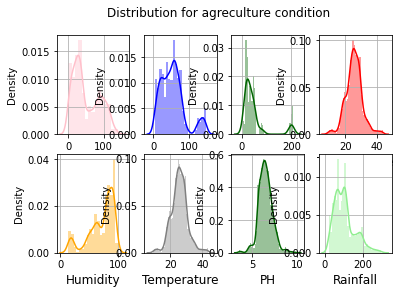

In [23]:
from numpy.core.fromnumeric import size

plt.subplot(2,4,1)
sb.distplot(df['N'], color = 'pink')
plt.xlabel('Nitrogen', fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sb.distplot(df['P'], color = 'blue')
plt.xlabel('Phospharus', fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sb.distplot(df['K'], color = 'darkgreen')
plt.xlabel('Potasium', fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sb.distplot(df['temperature'], color = 'red')
plt.xlabel('Temperature', fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sb.distplot(df['humidity'], color = 'orange')
plt.xlabel('Humidity', fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sb.distplot(df['temperature'], color = 'gray')
plt.xlabel('Temperature', fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sb.distplot(df['ph'], color = 'darkgreen')
plt.xlabel('PH', fontsize=12)
plt.grid()

plt.subplot(2,4,8)
sb.distplot(df['rainfall'], color = 'lightgreen')
plt.xlabel('Rainfall', fontsize=12)
plt.grid()

plt.suptitle("Distribution for agreculture condition")

plt.show()

In [27]:
# Now we are seprating unusualls patterns between data

print("Some interasting pattern")
print("______________________________________________________________________________________")
print("Crops require high ratio of nitrogen contents in soil ", df[df['N']>120]['label'].unique())
print("Crops require high ratio of phospurus contents in soil ", df[df['P']>100]['label'].unique())
print("Crops require high ratio of nitrogen potassium in soil ", df[df['N']>200]['label'].unique())
print("Crops require high rain fall ", df[df['rainfall']>200]['label'].unique())
print("Crops require high temprature ", df[df['temperature']>40]['label'].unique())
print("Crops require high ph ", df[df['ph']>9]['label'].unique())

Some interasting pattern
______________________________________________________________________________________
Crops require high ratio of nitrogen contents in soil  ['cotton']
Crops require high ratio of phospurus contents in soil  ['grapes' 'apple']
Crops require high ratio of nitrogen potassium in soil  []
Crops require high rain fall  ['rice' 'papaya' 'coconut']
Crops require high temprature  ['grapes' 'papaya']
Crops require high ph  ['mothbeans']


In [31]:
# Which crops we have to grow according to seasion

print("Summer crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("_______________________________________")
print("Winter crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("_______________________________________")
print("Winter crops")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())
print("_______________________________________")


Summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
_______________________________________
Winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
_______________________________________
Winter crops
['rice' 'papaya' 'coconut']
_______________________________________


In [32]:
# Above we make EXPLORATORY ANALYSIS with data

In [34]:
#Now we use clustaring analyasis 
# here we using k- means clustaring 

from sklearn.cluster import KMeans

#Removing label of colukn
x= df.drop(['label'], axis=1)

#Selecting all the values for the data
X= x.values

print(x.shape)


(2200, 7)


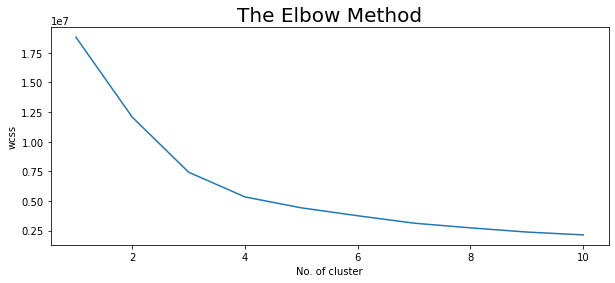

In [36]:
# Lets determine optimal no of clusters

plt.rcParams['figure.figsize']=(10,4)

wcss=[]

for i in range(1, 11):
  km = KMeans(n_clusters = i, init= 'k-means++', max_iter= 300, n_init = 10, random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

#Result plotting
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of cluster')
plt.ylabel('wcss')
plt.show()



In [37]:
# In above we can see there are 2 major elbows at 3 & 4 now we take gretest = 4

In [38]:
# Lets implement kmeans algo
km = KMeans(n_clusters=4, init='k-means++', max_iter= 300, n_init= 10, random_state = 0)
y_means= km.fit_predict(x)

# Result
a= df['label']
y_means= pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis=1)
z = z.rename(columns = {0: 'cluster'})

#Check cluster of each crop
print("Lets check the result after applying  the K Means clustering analysis")
print("Crops in first cluster:", z[z['cluster']==0]['label'].unique())
print("___________________________________________________________________")
print("Crops in first cluster:", z[z['cluster']==1]['label'].unique())
print("___________________________________________________________________")
print("Crops in first cluster:", z[z['cluster']==2]['label'].unique())
print("___________________________________________________________________")
print("Crops in first cluster:", z[z['cluster']==3]['label'].unique())
print("___________________________________________________________________")


Lets check the result after applying  the K Means clustering analysis
Crops in first cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
___________________________________________________________________
Crops in first cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
___________________________________________________________________
Crops in first cluster: ['grapes' 'apple']
___________________________________________________________________
Crops in first cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
___________________________________________________________________


In [ ]:
# As we can see above those crops who is in similer cluster they are similar 

In [39]:
# Now we are making predictive model where it can predict best crops according to given condition 

In [40]:
y=df['label']
x= df.drop(['label'], axis=1)

In [41]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


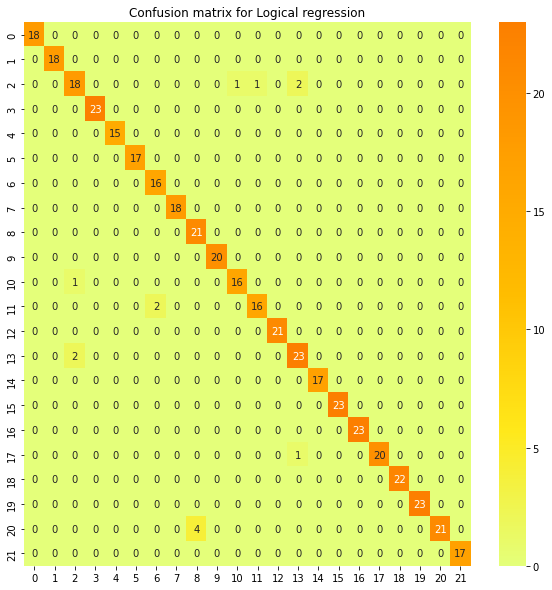

In [42]:
#Evaluate model performance
from sklearn.metrics import confusion_matrix

#Print confusion matrix first
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot= True, cmap= 'Wistia')
plt.title("Confusion matrix for Logical regression", fontsize = 12)
plt.show()


In [44]:
# Now print Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    